## Random forest

### Importation des modules

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.tools import *
from src.utils.metrics import *
from src.utils.extract_data import transform_parquet_to_csv
from src.utils.metrics_plot import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn import metrics

C:\Users\22sir\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\22sir\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\22sir\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe

### Dataframe des résultats

In [26]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

### Importation des données et mise en forme des dataframes

In [3]:
#importation des données
df0 = pd.read_parquet("C:/Users/22sir/Desktop/Stat app/dataset2.parquet", engine="pyarrow")
df = df0.copy()
df["Nombre labels"] = df.iloc[:,0:21].sum(axis=1)
df.sort_values("Nombre labels")

#dataframe des labels
labels = df.columns[:21]
df_labels = pd.DataFrame(data=labels,columns=['Label'])

In [4]:
#variables utiles
n_titre = len(df0) #nombre titres dans la base
n_audio = len(df0.loc[0,'audio_features']) #nombre de données audio
n_usage = len(df0.loc[0,'usage_features']) #nombre de données usage
n_label = len(df_labels) #nombre labels dans la base
p=0.5 #proportion de titres de la base utilisés

In [13]:
#Mise en forme de la base de données
transform_parquet_to_csv("C:/Users/22sir/Desktop/Stat app/dataset2.parquet",'dataset.csv')

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,k-pop,brazilian,metal,rap,jazz,electronic,african,country,audio_features,usage_features
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"[0.7089933156967163, -0.6799708008766174, -0.3...","[-0.008137362965188247, -0.004262254068607103,..."
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"[-0.19785162806510925, 0.023803016170859337, 0...","[0.00041993208544090015, 0.0001525178585704480..."
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[-0.14142198860645294, 0.26422423124313354, 0....","[-0.009766703341977859, 0.0019064089803134893,..."
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"[-0.07582522183656693, -0.42076417803764343, -...","[0.005023148381526522, 0.010775540737929749, 0..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[-0.16135981678962708, -0.07056394964456558, -...","[0.00517276708433931, 0.006723451311827004, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[-0.20596282184123993, 0.6139736771583557, 0.9...","[-4.880579792252423e-05, -0.00050152383974457,..."
50558,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"[0.04549933224916458, 0.23541370034217834, 0.2...","[0.012123792684851581, 0.007819905707498728, -..."
50559,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,"[-0.1633371263742447, 0.17180125415325165, 0.4...","[-0.00020487404595405032, 0.004180505956437296..."
50560,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,"[0.05751015990972519, -0.35426560044288635, 0....","[0.0018626741561819213, -0.002492404781046807,..."


In [5]:
#df, le dataframe qu'on utilise
df=pd.read_csv('dataset.csv')
df

,song_index,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
0,195,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
1,417,0,0,0,0,0,0,0,0,0,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
2,530,0,0,0,0,1,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
3,909,0,0,0,0,0,0,0,0,0,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
4,1257,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,49454,0,0,0,0,1,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
50558,49589,0,0,0,0,0,0,0,1,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
50559,49689,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504
50560,50137,0,0,0,0,0,0,0,0,0,...,0.063921,0.000640,-0.081422,-0.012015,-0.046315,-0.112069,0.017265,-0.063093,-0.134029,-0.007111


In [6]:
#sélection d'une partie seulement du dataframe pour limiter les temps de calcul
df_audio = df.sample(int(p*n_titre), random_state=0)

### Le modèle de random forest

#### Premier modèle juste sur le label pop

###### Juste avec les audio features

In [7]:
#randomforest sur le label pop et calcul de l'accuracy

#df_genre = df_audio.iloc[:,[j]+[i for i in range(22,278)]]
Y = df_audio[["pop"]]
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17696, 255)
Training Labels Shape: (17696, 1)
Testing Features Shape: (7585, 255)
Testing Labels Shape: (7585, 1)


In [14]:
#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

0.8768622280817403

In [15]:
#Accuracy
metrics.accuracy_score(y_test, y_pred)

0.8768622280817403

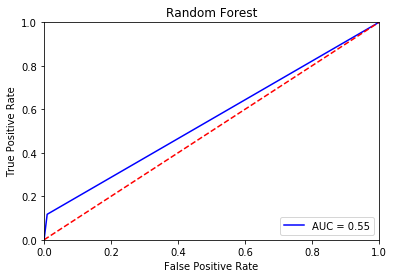

0.5540210815023475

In [22]:
#ROC
plot_roc_curve(y_test,y_pred,"Random Forest")

###### Juste avec les usages

In [131]:
Y = df_audio[["pop"]]
X = df_audio[["usage_feature_"+str(i) for i in range(1,n_usage)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

In [132]:
#Accuracy
accuracy_score(y_test, y_pred)

0.9369808833223467

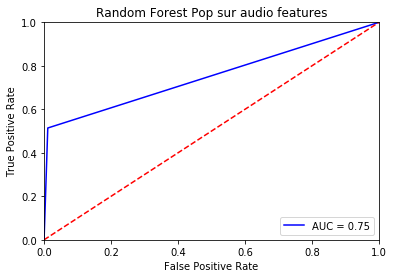

0.751552202295363

In [136]:
#ROC
plot_roc_curve(y_test,y_pred,"Random Forest Pop sur audio features")

###### Features audio+usage

In [139]:
Y = df_audio[["pop"]]
X = df_audio[["usage_feature_"+str(i) for i in range(1,n_usage)]+["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train,y_train)
y_pred=model_rf.predict(X_test)

In [140]:
#Accuracy
accuracy_score(y_test, y_pred)

0.9346077785102175

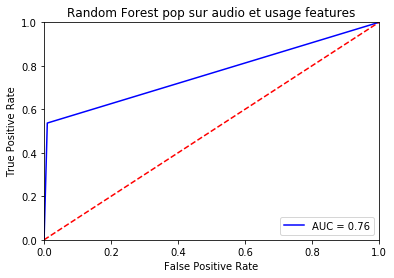

0.7636781626974843

In [141]:
#ROC
plot_roc_curve(y_test,y_pred,"Random Forest pop sur audio et usage features")

#### Optimisation des hyperparamètres pour le pop

In [24]:
# Number of trees in random forest
n_estimators = [5000,2000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4]}


In [27]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 120.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [28]:
rf_random.best_params_

{'n_estimators': 1100, 'min_samples_leaf': 1, 'max_features': 'auto'}

In [9]:
#Create a Gaussian Classifier
model_rf_opt=RandomForestClassifier(n_estimators=1100, min_samples_leaf = 1, max_features = "auto")

In [13]:
#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf_opt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_pred=model_rf_opt.predict(X_test)

0.8734344100197758

In [15]:
#Accuracy avec optimisation
metrics.accuracy_score(y_test, y_pred)

0.8734344100197758

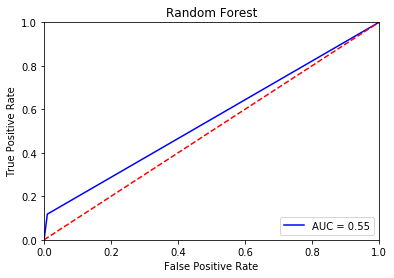

0.5541837526055932

In [16]:
#ROC avec optimisation
plot_roc_curve(y_test,y_pred,"Random Forest")

#### RF avec option multioutput de scikitlearn

In [10]:
Y = df_audio.iloc[:,1:22]
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [11]:
from sklearn.multioutput import MultiOutputClassifier
multi_target_forest = MultiOutputClassifier(model_rf_opt, n_jobs=-1)

In [12]:
multi_target_forest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=1100,
                                                       n_jobs=None,
                   

In [16]:
y_pred = multi_target_forest.predict(X_test)

In [30]:
final_res.loc['RF multioutput']=all_metrics(y_test,y_pred)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042


#### RF avec option chained de scikitlearn
##### Audio features

In [118]:
from sklearn.multioutput import ClassifierChain

In [151]:
Y = df_audio.iloc[:,1:22]
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [23]:
chain = ClassifierChain(model_rf_opt, order="random", random_state=3)
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(bootstrap=True,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=1100,
                                                      n_jobs=None,
                                

In [ ]:
y_pred_chain = chain.predict(X_test)

In [31]:
final_res.loc['RF chain']=all_metrics(y_test,y_pred_chain)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042


##### Usage features

In [154]:
Y = df_audio.iloc[:,1:22]
X = df_audio[["usage_feature_"+str(i) for i in range(1,n_usage)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [155]:
chain = ClassifierChain(model_rf_opt, order="random", random_state=3)
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=RandomForestClassifier(bootstrap=True,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=1100,
                                                      n_jobs=None,
                                

In [156]:
y_pred_chain = chain.predict(X_test)
final_res.loc['RF chain usage features']=all_metrics(y_test,y_pred_chain)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042
RF à la main,0.397,0.803,0.330,0.468,0.043
RF à la main usage features,0.709,0.920,0.783,0.846,0.016
RF à la main usage+audio features,0.672,0.916,0.735,0.816,0.019
RF chain usage features,0.767,0.923,0.796,0.855,0.015


##### Usage+audio features

In [158]:
Y = df_audio.iloc[:,1:22]
X = df_audio[["usage_feature_"+str(i) for i in range(1,n_usage)]+["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
chain = ClassifierChain(model_rf_opt, order="random", random_state=3)
chain.fit(X_train, y_train)

In [ ]:
y_pred_chain = chain.predict(X_test)
final_res.loc['RF chain usage+audio features']=all_metrics(y_test,y_pred_chain)
final_res

#### RF avec option labelpowerset de scikit learn
Pas assez de mémoire

In [120]:
from skmultilearn.problem_transform import LabelPowerset

In [121]:
Y = df_audio.iloc[:,1:22]
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
ps = LabelPowerset(model_rf_opt)
ps.fit(X_train, y_train)

In [ ]:
y_pred_powerset = ps.predict(X_test)

In [ ]:
final_res.loc['RF powerset']=all_metrics(y_test,y_pred_chain)
final_res

#### Un RF pour chaque label
###### Audio features

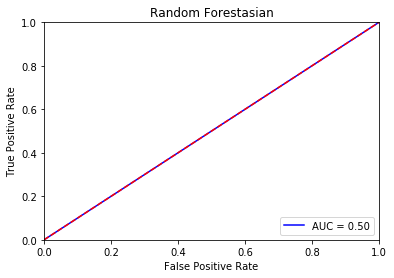

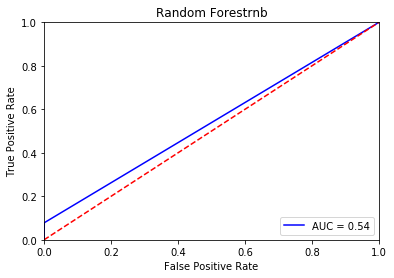

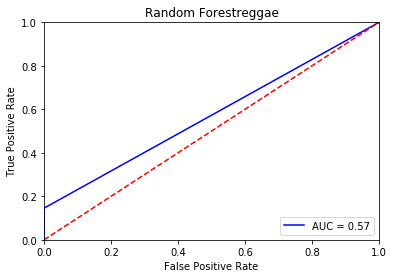

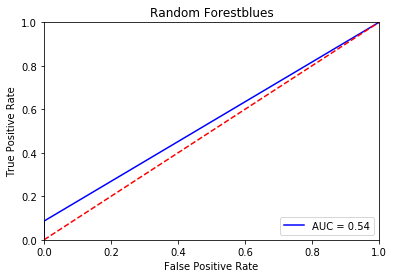

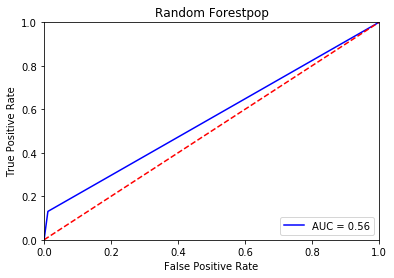

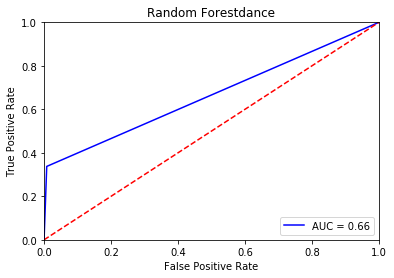

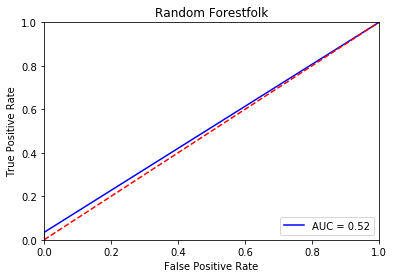

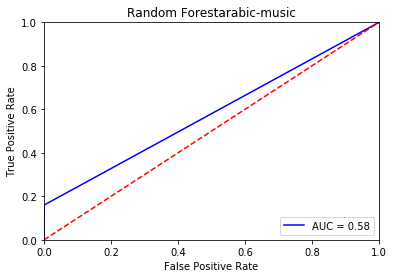

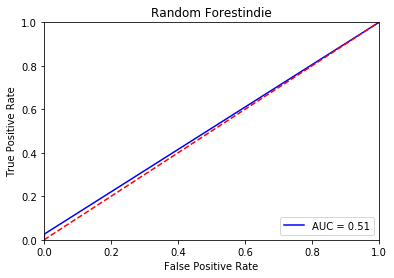

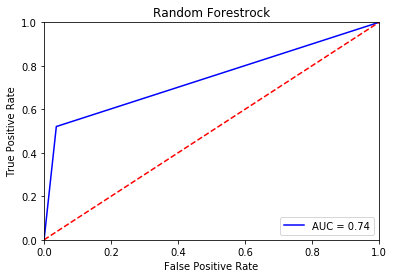

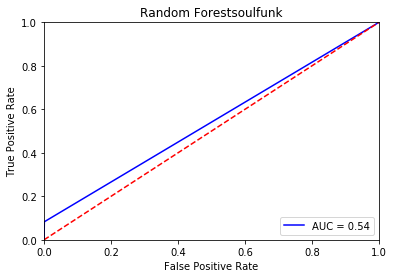

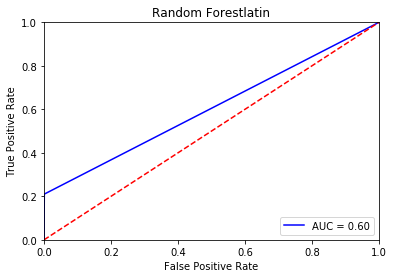

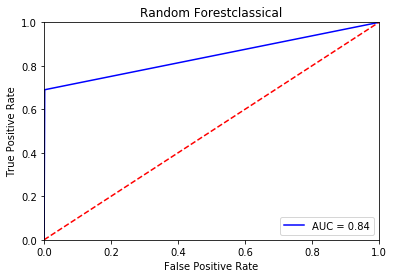

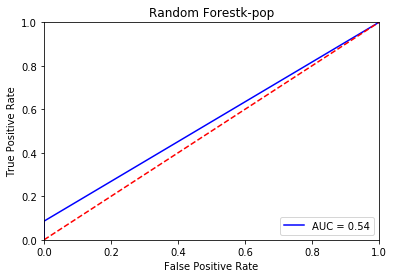

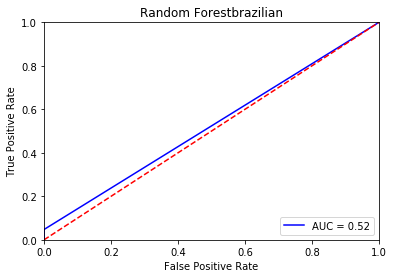

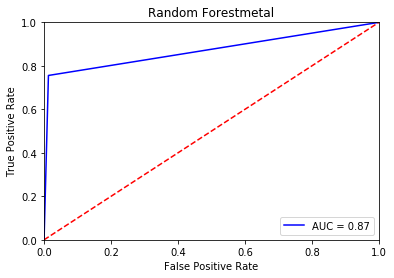

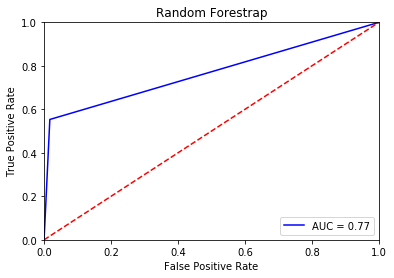

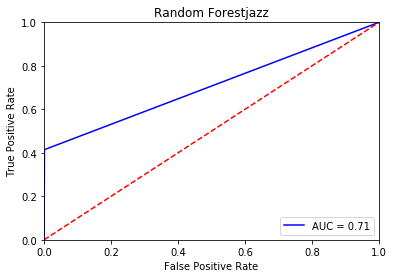

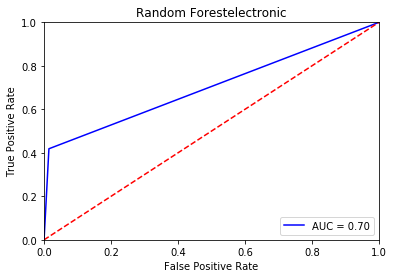

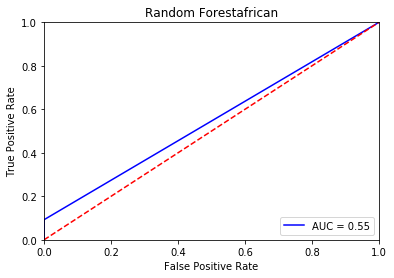

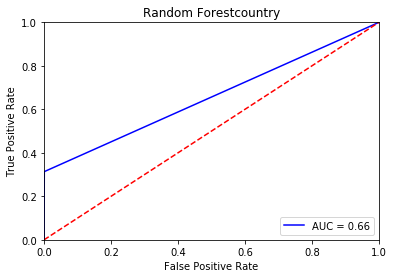

In [111]:
#on passe à tous les labels

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]]

for j in range(n_label):
    label = df_labels.loc[j,"Label"]
    Y = df_audio[label].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    df_test[label]=y_test

    #Train the model using the training sets y_pred=clf.predict(X_test)
    model_rf.fit(X_train,y_train)
    y_pred=model_rf.predict(X_test)
    df_hat[label]=y_pred
    df_labels.loc[j,"Accuracy"] = accuracy_score(y_test, y_pred)
    plot_roc_curve(y_test,y_pred,"Random Forest"+label)

In [113]:
#les donnés de test
df_test

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7583,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
#les prédictions
df_hat

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
final_res.loc['RF à la main']=all_metrics(df_test.values,df_hat.values)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042
RF à la main,0.397,0.803,0.330,0.468,0.043


Text(0.5, 1, 'Accuracy en fonction des labels')

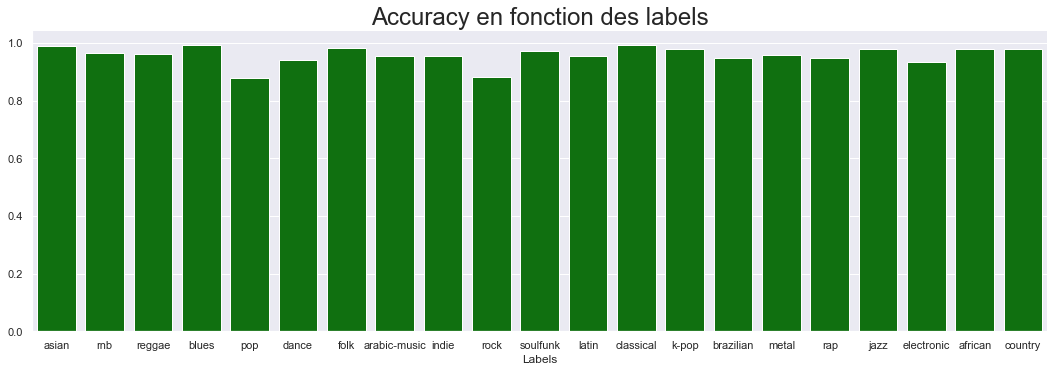

In [52]:
#représentation accuracy en fonction des labels
sns.set()
g = sns.catplot(x='Label', y='Accuracy', data=df_labels, kind = "bar", height = 5, aspect = 3, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Labels', size = 12)
plt.title('Accuracy en fonction des labels', size=24)

###### Usage features

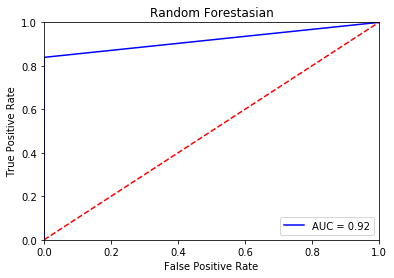

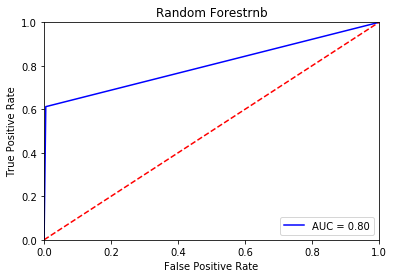

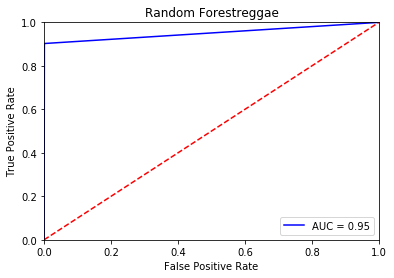

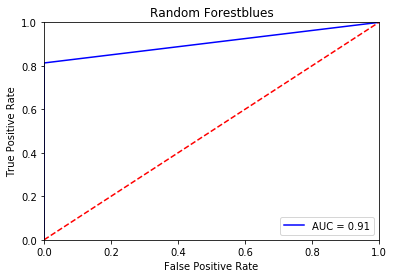

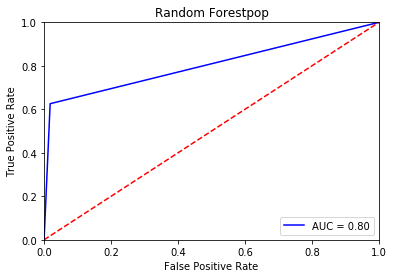

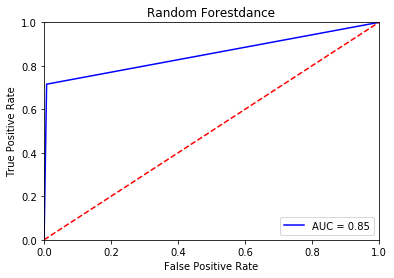

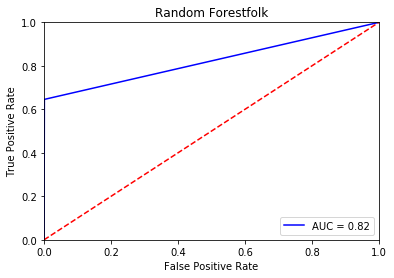

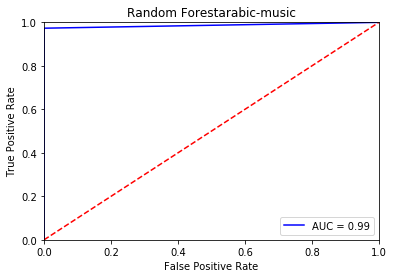

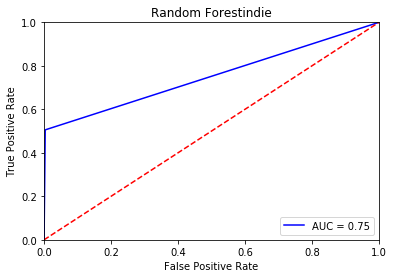

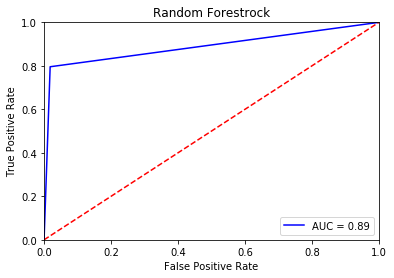

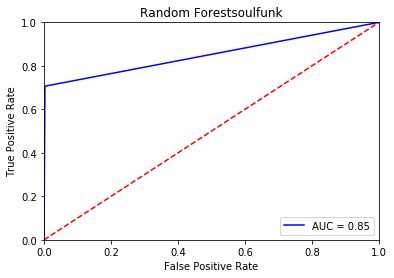

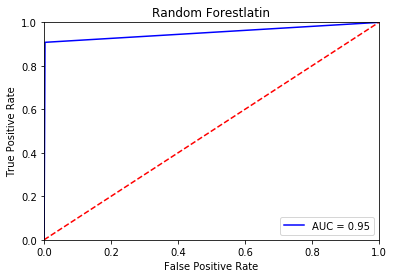

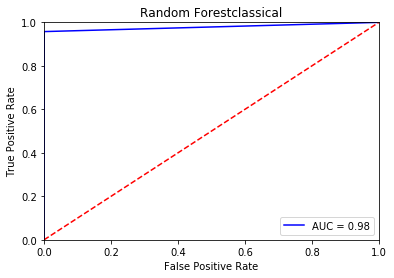

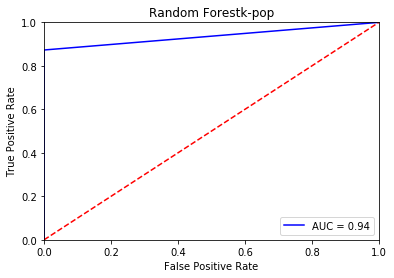

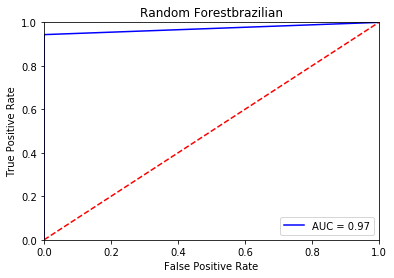

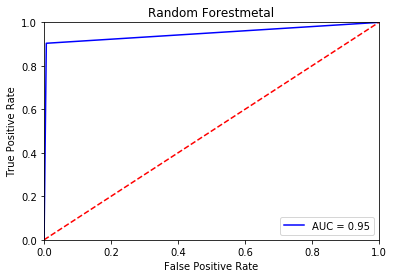

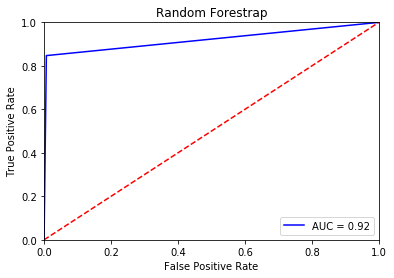

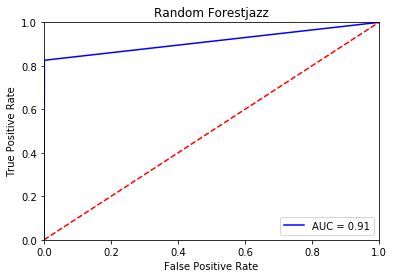

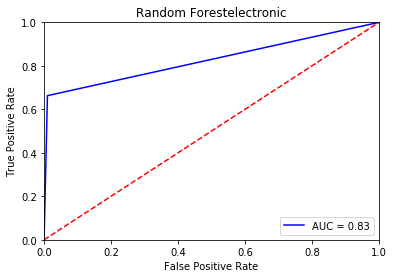

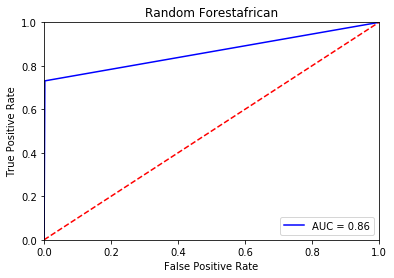

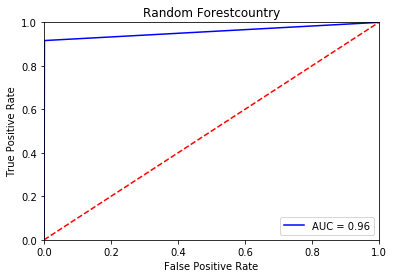

In [144]:
#on passe à tous les labels

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)
df_hat_usage=pd.DataFrame()
df_test_usage=pd.DataFrame()
X = df_audio[["usage_feature_"+str(i) for i in range(1,n_usage)]]

for j in range(n_label):
    label = df_labels.loc[j,"Label"]
    Y = df_audio[label].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    df_test_usage[label]=y_test

    #Train the model using the training sets y_pred=clf.predict(X_test)
    model_rf.fit(X_train,y_train)
    y_pred=model_rf.predict(X_test)
    df_hat_usage[label]=y_pred
    df_labels.loc[j,"Accuracy usage features"] = accuracy_score(y_test, y_pred)
    plot_roc_curve(y_test,y_pred,"Random Forest"+label)

In [146]:
final_res.loc['RF à la main usage features']=all_metrics(df_test_usage.values,df_hat_usage.values)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042
RF à la main,0.397,0.803,0.330,0.468,0.043
RF à la main usage features,0.709,0.920,0.783,0.846,0.016


Text(0.5, 1, 'Accuracy en fonction des labels')

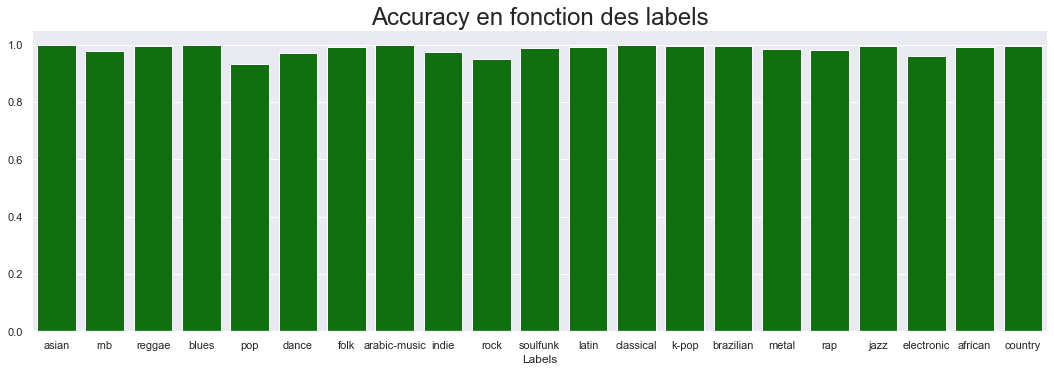

In [147]:
#représentation accuracy en fonction des labels
sns.set()
g = sns.catplot(x='Label', y="Accuracy usage features", data=df_labels, kind = "bar", height = 5, aspect = 3, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Labels', size = 12)
plt.title('Accuracy en fonction des labels', size=24)

###### Usage + audio features

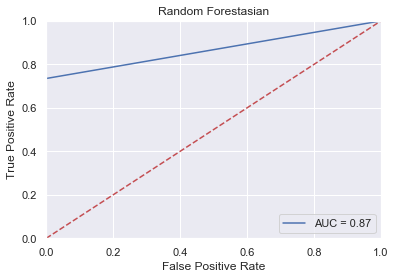

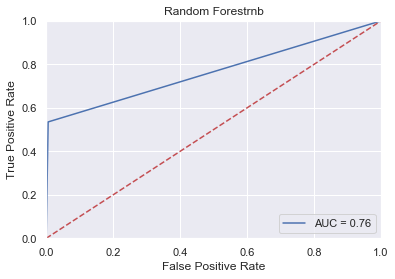

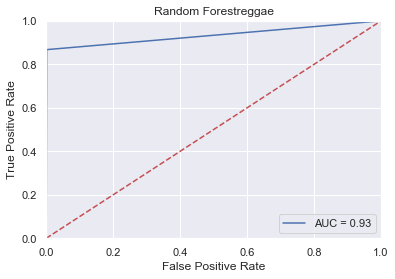

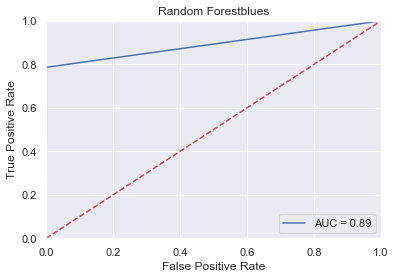

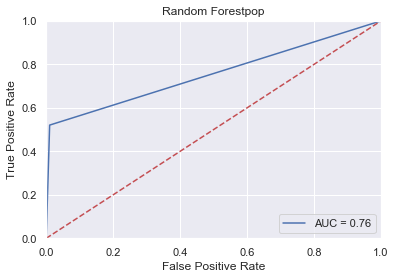

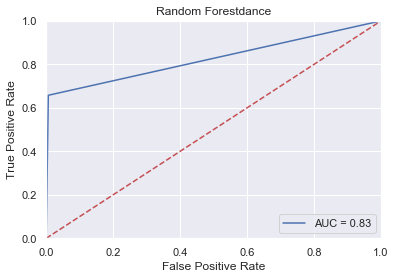

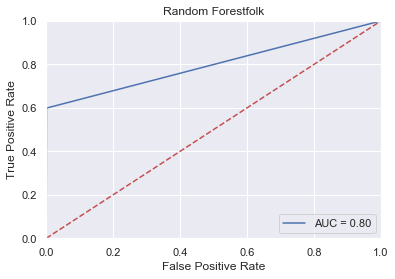

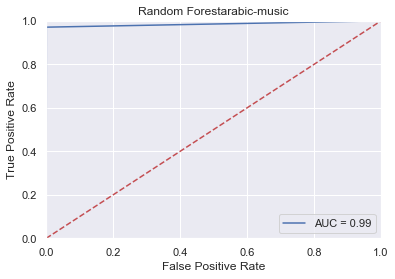

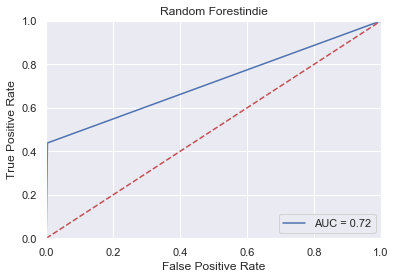

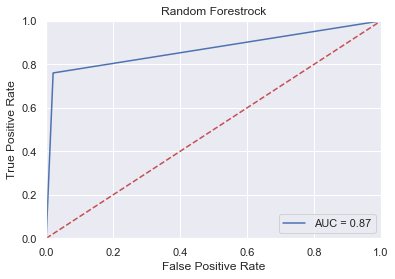

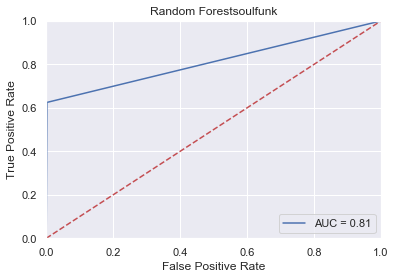

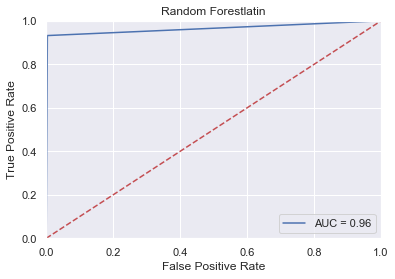

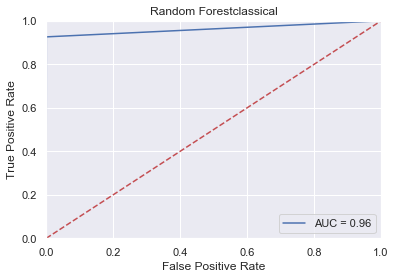

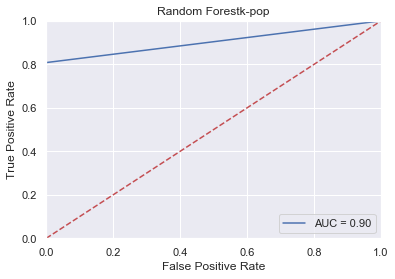

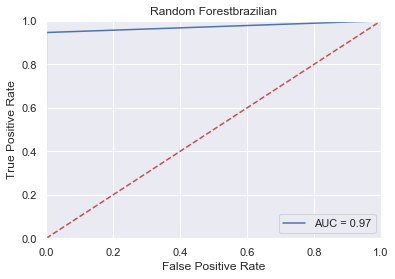

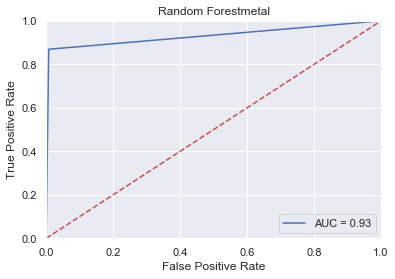

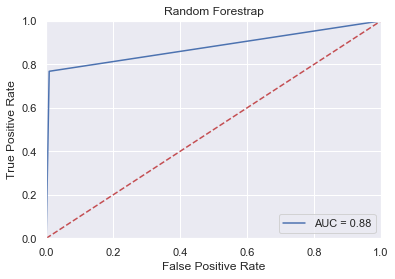

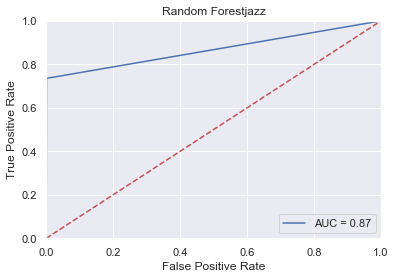

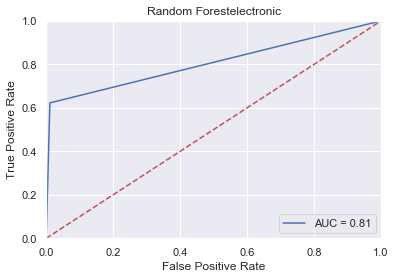

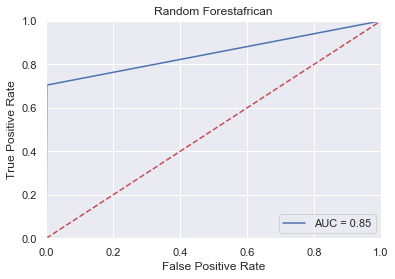

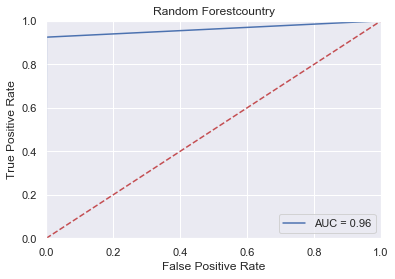

In [148]:
#on passe à tous les labels

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)
df_hat_ua=pd.DataFrame()
df_test_ua=pd.DataFrame()
X = df_audio[["audio_feature_"+str(i) for i in range(1,n_audio)]+["usage_feature_"+str(i) for i in range(1,n_usage)]]

for j in range(n_label):
    label = df_labels.loc[j,"Label"]
    Y = df_audio[label].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    df_test_ua[label]=y_test

    #Train the model using the training sets y_pred=clf.predict(X_test)
    model_rf.fit(X_train,y_train)
    y_pred=model_rf.predict(X_test)
    df_hat_ua[label]=y_pred
    df_labels.loc[j,"Accuracy usage+audio features"] = accuracy_score(y_test, y_pred)
    plot_roc_curve(y_test,y_pred,"Random Forest"+label)

In [149]:
final_res.loc['RF à la main usage+audio features']=all_metrics(df_test_ua.values,df_hat_ua.values)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
RF multioutput,0.299,0.796,0.331,0.467,0.042
RF chain,0.308,0.793,0.336,0.472,0.042
RF à la main,0.397,0.803,0.330,0.468,0.043
RF à la main usage features,0.709,0.920,0.783,0.846,0.016
RF à la main usage+audio features,0.672,0.916,0.735,0.816,0.019


Text(0.5, 1, 'Accuracy en fonction des labels')

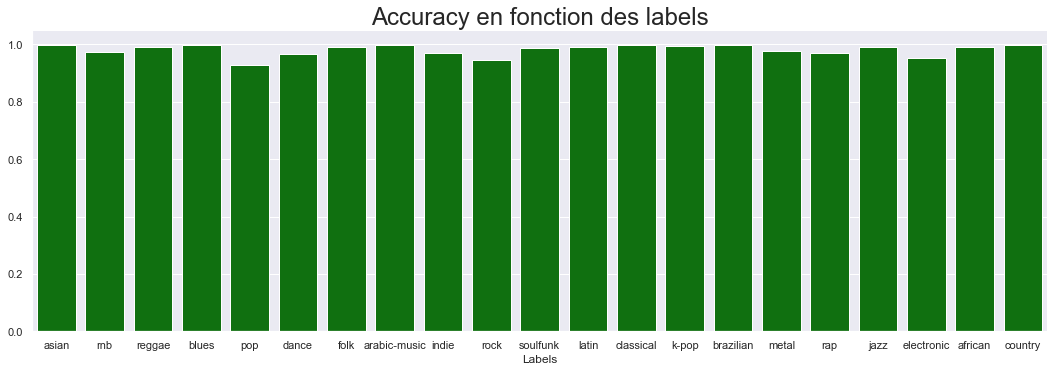

In [150]:
#représentation accuracy en fonction des labels
sns.set()
g = sns.catplot(x='Label', y="Accuracy usage+audio features", data=df_labels, kind = "bar", height = 5, aspect = 3, color = "green")
g.set_axis_labels('', '')
plt.xlabel('Labels', size = 12)
plt.title('Accuracy en fonction des labels', size=24)